In [91]:
# importing libraries

In [92]:
import cv2
import pandas as pd
import numpy as np

In [93]:
img=cv2.imread('ora2.jfif')#image path

In [94]:
#model and weight initialization
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 0000024A92B50890>

In [95]:
# detecting oranges (classid=55)
classIds, confs, bbox = net.detect(img,confThreshold=0.5)
for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
    if classId==55:
        img=cv2.rectangle(img,box,color=(0,255,0),thickness=2)
        img=cv2.putText(img,"ORANGE",(box[0]+10,box[1]+30),
                        cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            

In [96]:
#Press ESC to exit
while True:
    cv2.imshow('my',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [97]:
# detecting oranges from live videos

In [102]:
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)
cap.set(10,70)
while True:
    success,img = cap.read()
    classIds, confs, bbox = net.detect(img,confThreshold=0.5)
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            if classId==55:
                cv2.rectangle(img,box,color=(0,255,0),thickness=2)
                cv2.putText(img,'person',(box[0]+10,box[1]+30),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
                cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

    cv2.imshow("Output",img)
    if cv2.waitKey(25) & 0xff == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [89]:
# # Percentage of orange color

import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

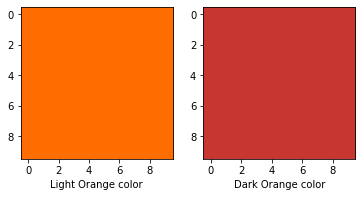

In [90]:
#defining the range of orange color
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.xlabel('Light Orange color')
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.xlabel('Dark Orange color')
plt.show()

In [70]:
def orange_color_percertage(img,show_image=0):
    #img must be in BGR form
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grid_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(grid_HSV, light_orange, dark_orange)
    res = cv2.bitwise_and(img, img, mask=mask)
    if show_image==1:
        #print("Orange Part of Image")
        plt.figure(figsize=(20,8))
        plt.imshow(res)
    return (mask>0).mean()

0.13131588100963357

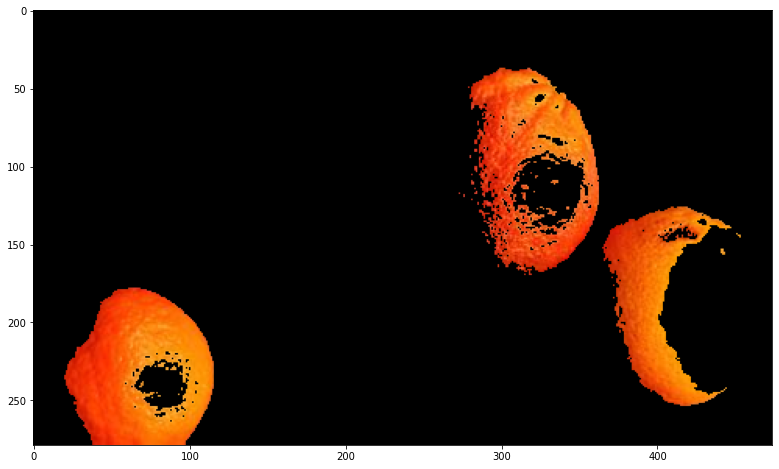

In [81]:
orange_color_percertage(img,show_image=1)

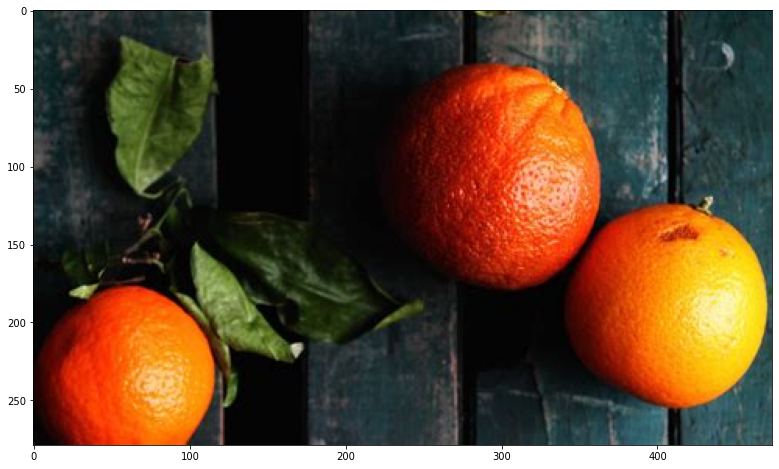

In [80]:
# Prginting the original picture after converting to RGB
plt.figure(figsize=(20,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 